https://sinav30.conagua.gob.mx:8080/Presas/
https://sinav30.conagua.gob.mx:8080/PresasPG/presas/reporte/2023-10-12


In [119]:
import requests
import pandas as pd
import json
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [118]:
def download_data_and_save_to_json(date, output_folder):
    print(date)
    url = f'https://sinav30.conagua.gob.mx:8080/PresasPG/presas/reporte/{date}' 
    json_filename = os.path.join(output_folder, f'data_{date}.json')


    if os.path.exists(json_filename):
        print(f"Datos existentes para la fecha: {date}, no se descargan nuevamente.")
        return
    
    try:
        response = requests.get(url)

        if response.status_code == 200:
            response_text = response.content.decode('utf-8')

            response_data = json.loads(response_text)

            df = pd.DataFrame(response_data)

            json_filename = os.path.join(output_folder, f'data_{date}.json')
            df.to_json(json_filename, orient='records')

            print(f"Datos para la fecha: {date} guerdados como {json_filename}")

        else:
            print(f"No se obtuvieron datos para la fecha: {date}. Código: {response.status_code}")

    except requests.exceptions.RequestException as e:
        print(f"Error con la fecha: {date}: {e}")


In [137]:

start_date = datetime(2010, 1, 24)
end_date = datetime.today()

output_folder = 'datos_presas'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

current_date = start_date
while current_date <= end_date:
    download_data_and_save_to_json(current_date.strftime('%Y-%m-%d'), output_folder)
    current_date += timedelta(days=1)


2015-01-24
Datos para la fecha: 2015-01-24 guerdados como datos_presas/data_2015-01-24.json
2015-01-25
Datos para la fecha: 2015-01-25 guerdados como datos_presas/data_2015-01-25.json
2015-01-26
Datos para la fecha: 2015-01-26 guerdados como datos_presas/data_2015-01-26.json
2015-01-27
Datos para la fecha: 2015-01-27 guerdados como datos_presas/data_2015-01-27.json
2015-01-28
Datos para la fecha: 2015-01-28 guerdados como datos_presas/data_2015-01-28.json
2015-01-29
Datos para la fecha: 2015-01-29 guerdados como datos_presas/data_2015-01-29.json
2015-01-30
Datos para la fecha: 2015-01-30 guerdados como datos_presas/data_2015-01-30.json
2015-01-31
Datos para la fecha: 2015-01-31 guerdados como datos_presas/data_2015-01-31.json
2015-02-01
Datos para la fecha: 2015-02-01 guerdados como datos_presas/data_2015-02-01.json
2015-02-02
Datos para la fecha: 2015-02-02 guerdados como datos_presas/data_2015-02-02.json
2015-02-03
Datos para la fecha: 2015-02-03 guerdados como datos_presas/data_2015

In [138]:
import pandas as pd
import os

def merge_jsons_in_folder(folder_path):
    try:
        files = os.listdir(folder_path)

        json_files = [file for file in files if file.endswith('.json')]

        if not json_files:
            print("Folder sin JSONs.")
            return None

        merged_df = pd.DataFrame()

        for file_name in json_files:
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_json(file_path)
            merged_df = pd.concat([merged_df, df], ignore_index=True)

        return merged_df

    except Exception as e:
        print(f"No se pudo hacer merge de los JSONs: {e}")
        return None

def save_merged_df_to_json(merged_df, output_file):
    try:
        if merged_df is not None:
            merged_df.to_json(output_file, orient='records')
            print(f"Datos mezclados en: '{output_file}'")

    except Exception as e:
        print(f"Error al guardar todos los datos en un solo JSON: {e}")

folder_path = 'datos_presas'  
output_file = 'historico.json'  
merged_df = merge_jsons_in_folder(folder_path)
save_merged_df_to_json(merged_df, output_file)


Datos mezclados en: 'historico.json'


In [139]:
import pandas as pd

json_file_path = 'historico.json'
dfHistorico = None
try:
    dfHistorico = pd.read_json(json_file_path)

except Exception as e:
    print(f"Error al abrir el JSON: {e}")


In [145]:
#dfHistorico.head(10)

dfHistoricoNL = dfHistorico[dfHistorico['estado'] == 'Nuevo León']

columns_of_interest = ['fechamonitoreo', 'clavesih', 'nombreoficial', 'nombrecomun', 'nommunicipio', 'llenano']

dfHistoricoNL = dfHistoricoNL.loc[:, columns_of_interest]

dfHistoricoNL['fechamonitoreo'] = pd.to_datetime(dfHistoricoNL['fechamonitoreo'])
dfHistoricoNL = dfHistoricoNL.sort_values(by='fechamonitoreo')
dfHistoricoNL = dfHistoricoNL[dfHistoricoNL['llenano'] <= 1.0]

prefix_to_remove = ', N.L.'

dfHistoricoNL['nombrecomun'] = dfHistoricoNL['nombrecomun'].str.replace(prefix_to_remove, '', regex=False)
dfHistoricoNL['nombrecomun'] = dfHistoricoNL['nombrecomun'] + prefix_to_remove
#replace(prefix_to_remove, '', regex=False)

dfHistoricoNL.head(10)

,fechamonitoreo,clavesih,nombreoficial,nombrecomun,nommunicipio,llenano
318304,2015-01-24,PSANL,"Salinillas, N.L.","Salinillas, N.L.",Anáhuac,0.729472
477781,2015-01-25,PSANL,"Salinillas, N.L.","Salinillas, N.L.",Anáhuac,0.729472
198550,2015-01-26,PSANL,"Salinillas, N.L.","Salinillas, N.L.",Anáhuac,0.729472
279679,2015-01-27,LBCNL,"Rodrigo Gómez, N.L.","La Boca, N.L.",Santiago,1.000000
279721,2015-01-27,PSANL,"Salinillas, N.L.","Salinillas, N.L.",Anáhuac,0.727211
364114,2015-01-28,LBCNL,"Rodrigo Gómez, N.L.","La Boca, N.L.",Santiago,0.998743
364118,2015-01-28,PSANL,"Salinillas, N.L.","Salinillas, N.L.",Anáhuac,0.727211
435520,2015-01-29,LBCNL,"Rodrigo Gómez, N.L.","La Boca, N.L.",Santiago,0.996200
435447,2015-01-29,PSANL,"Salinillas, N.L.","Salinillas, N.L.",Anáhuac,0.727211
182723,2015-01-30,LBCNL,"Rodrigo Gómez, N.L.","La Boca, N.L.",Santiago,0.994943


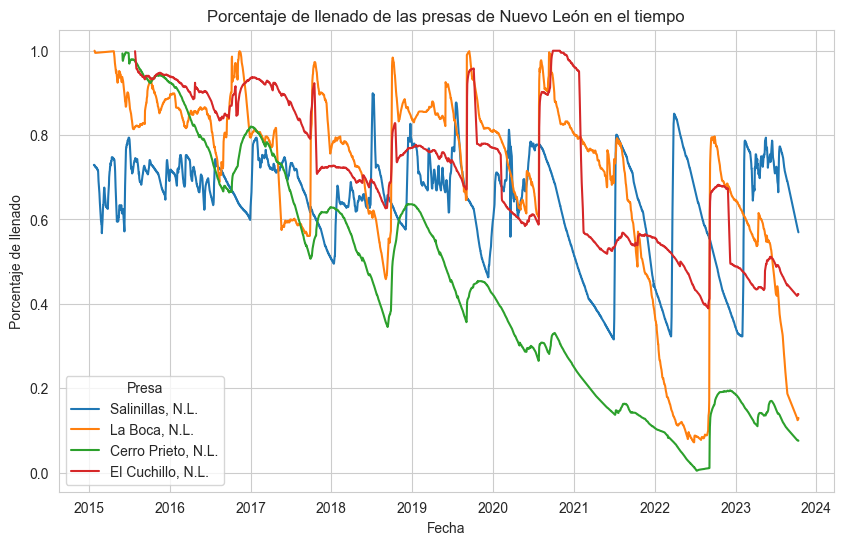

In [146]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='fechamonitoreo', y='llenano', data=dfHistoricoNL, hue='nombrecomun')
plt.title('Porcentaje de llenado de las presas de Nuevo León en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de llenado')
plt.legend(title='Presa', loc='best')
plt.show()


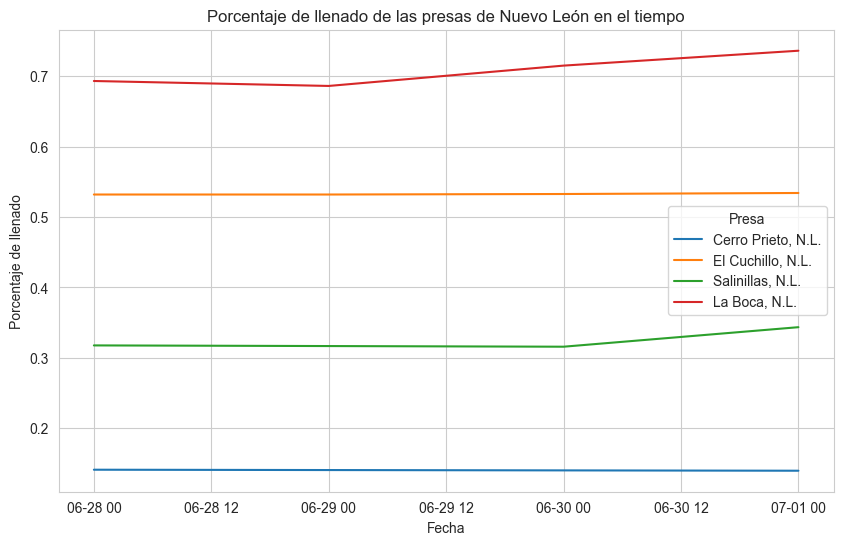

In [147]:
start_date = '2021-06-28'
end_date = '2021-07-01'

filtered_df = dfHistoricoNL[(dfHistoricoNL['fechamonitoreo'] >= start_date) & (dfHistoricoNL['fechamonitoreo'] <= end_date)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='fechamonitoreo', y='llenano', data=filtered_df, hue='nombrecomun')
plt.title('Porcentaje de llenado de las presas de Nuevo León en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de llenado')
plt.legend(title='Presa', loc='best')
plt.show()


